# Fábio Gonçalves
# Sprint #5


## Modeling

In [1]:
import re
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
from datetime import datetime as dt
import matplotlib.pyplot as plt
import sys
import numpy as np


#função de leitura do ficheiro e extração dos dados 'data, ip, user'
def get_ip():
    year=2021
    with open('bigdata-full.txt') as file:
        for line in file:
            find_str = '(.*) moodle (.*)authentication failure;(.*)rhost=(.*)  user=(.*)'
            result = re.match(find_str, line)
            if result:
                date = f'{2021} {result.group(1)}'#concatena o ano 2021 à restade dta extraida
                ip, user = result.groups()[3:5] # Guarda o IP e o user nas variaveis destinadas
                yield (date, ip, user)

In [2]:
table_list = [item for item in get_ip()] # iterador / percorre a função get_ip e guarda numa lista 
table = pd.DataFrame(table_list) # converte Lista em Dataframe
table.index=pd.to_datetime(table[0], format= '%Y %b %d %H:%M:%S') #converte index em datatime 
table.rename(columns={1:'ip', 2:'user' }, inplace=True) # renomea as colunas
del (table[0]) # elimina coluna da data extraida
table.index.names = ["date"] # renomeia a coluna table.index
table # imprime tabela


,ip,user
date,,
2021-06-17 09:19:01,60.18.229.201,root
2021-06-17 09:19:21,60.18.229.201,root
2021-06-17 09:19:42,60.18.229.201,root
2021-06-17 09:20:03,60.18.229.201,root
2021-06-17 09:20:23,60.18.229.201,root
...,...,...
2021-06-22 12:36:51,182.100.67.52,root
2021-06-22 12:37:11,182.100.67.52,root
2021-06-22 12:37:29,182.100.67.52,root


## Memory usage analisys

In [3]:
size_frame=sys.getsizeof(table)/1024 # calcula o tamanho do dataframe em KiB
size_lists=sys.getsizeof(table_list)/1024 # calcula o tamanho da lista em KiB
print(f'Size lists: {size_lists:.1f} KiB')   
print(f'Size dataframe: {size_frame:.1f} KiB')
del table_list # apaga lista / já não preciso e ocupa memória

Size lists: 133.4 KiB
Size dataframe: 2149.0 KiB


## User analisys


In [4]:
data=table # describe da tabela original
data.user.describe()

count     15856
unique       15
top        root
freq      15748
Name: user, dtype: object

In [5]:
data.user.value_counts() # Contagem de ataques por user

root            15748
ftp                25
adm                17
tomcat             16
apache             13
mysql              10
operator            7
nobody              5
sshd                5
bin                 3
sync                2
cesar.freire        2
ntp                 1
halt                1
cacti               1
Name: user, dtype: int64

Text(0.5, 0, "user's")

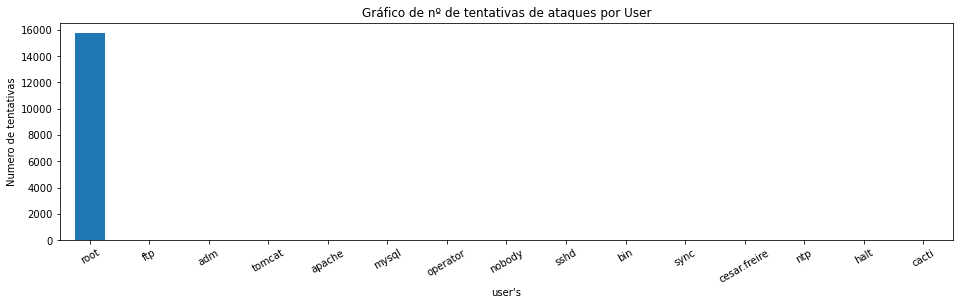

In [6]:
#plot dos dados acima - ataques por user
attack=data.user.value_counts()
attack.plot(kind='bar',figsize=(16,4))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Gráfico de nº de tentativas de ataques por User')
plt.ylabel('Numero de tentativas')
plt.xlabel("user's")

## Grafhical analisys of login failure except 'root'

Text(0.5, 0, "user's")

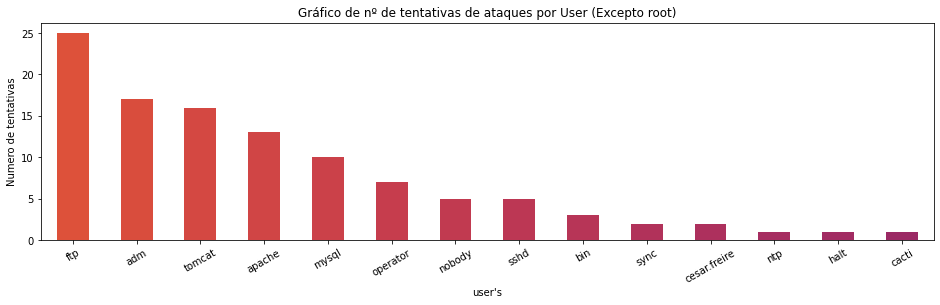

In [7]:
#plot dos ataques por user com excepção do user root
color = cm.inferno_r(np.linspace(.4, .8, 30))
attack_not_root = data.user[data.user != 'root' ].value_counts() # contagem de ataques com excepção de Root
attack_not_root.plot(kind='bar', stacked=True, color=color, legend=False, figsize=(16, 4))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Gráfico de nº de tentativas de ataques por User (Excepto root)')
plt.ylabel('Numero de tentativas')
plt.xlabel("user's")

Text(0.5, 0, 'Dias')

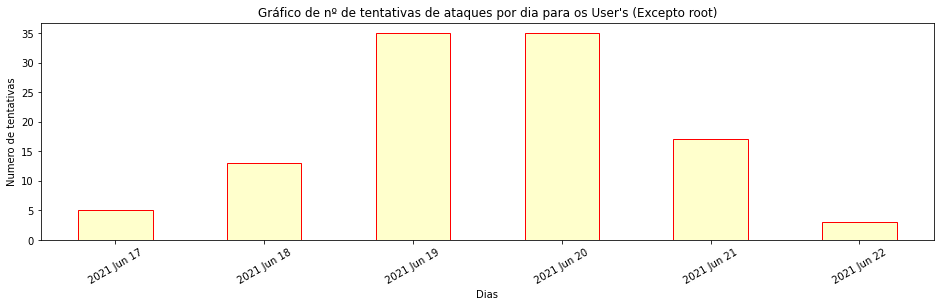

In [8]:
#plot de ataques diários com a excepção de root
not_root = table[ table.user != 'root' ]
atack_not_root_day = not_root.index.floor('d').value_counts().sort_index() #arrendonda os dias, faz contagem e ordena
atack_not_root_day.index = atack_not_root_day.index.strftime('%Y %b %d')#reordena data e tira as horas
atack_not_root_day.plot(kind='bar', figsize=(16,4), color=(1, 1,0.8 ),  edgecolor='red')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Gráfico de nº de tentativas de ataques por dia para os User's (Excepto root)")
plt.ylabel('Numero de tentativas')
plt.xlabel("Dias")

# Grafhical analisys of login failure'root'

In [9]:
# describe dos ataques do user root
root = table[ table.user == 'root' ]
root.describe()

,ip,user
count,15748,15748
unique,158,1
top,218.65.30.61,root
freq,7193,15748


In [10]:
#contagem de ataques a root
root.value_counts()

ip                  user
218.65.30.61        root    7193
182.100.67.52       root    6932
201.157.125.37      root     522
182.100.67.231      root     291
60.18.229.201       root     163
                            ... 
182.79.223.194      root       1
182.253.197.82      root       1
182.23.45.67        root       1
181.57.163.201      root       1
zabbix.wbmx.com.br  root       1
Length: 158, dtype: int64

Text(0.5, 0, 'Dias')

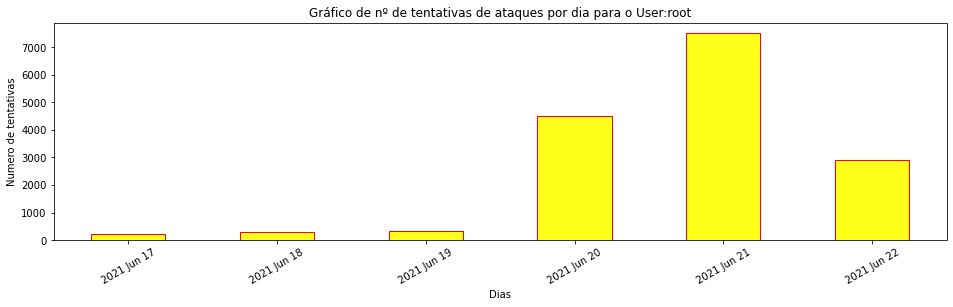

In [11]:
#Plot de ataques diarios ao user root
atack_root = root.index.floor('d').value_counts().sort_index()  #arrendonda os dias, faz contagem e ordena
atack_root.index = atack_root.index.strftime('%Y %b %d') #reordena data e tira as horas
atack_root.plot(kind='bar', figsize=(16,4), color=(1, 1, 0.1),  edgecolor='red')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Gráfico de nº de tentativas de ataques por dia para o User:root')
plt.ylabel('Numero de tentativas')
plt.xlabel("Dias")

## Evolution of attack per time all users

Text(0.5, 0, 'Dias')

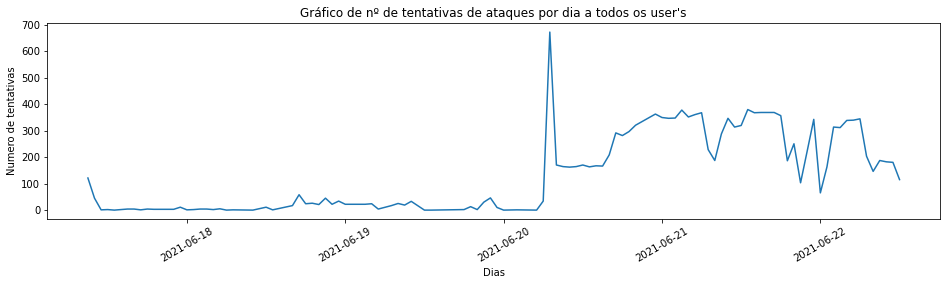

In [12]:
#plot de ataques por data para todos os user´s
attacks_per_hour=root.index.floor('H').value_counts() #arrendonda os horas e faz contagem
attacks_per_hour.plot(figsize=(16,4))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Gráfico de nº de tentativas de ataques por dia a todos os user's")
plt.ylabel('Numero de tentativas')
plt.xlabel("Dias")

In [13]:
#describe de ataques por data para todos os user´s
attacks_per_hour.sort_index().describe

<bound method NDFrame.describe of 2021-06-17 09:00:00    122
2021-06-17 10:00:00     46
2021-06-17 11:00:00      2
2021-06-17 12:00:00      3
2021-06-17 13:00:00      1
                      ... 
2021-06-22 08:00:00    147
2021-06-22 09:00:00    188
2021-06-22 10:00:00    183
2021-06-22 11:00:00    181
2021-06-22 12:00:00    116
Name: date, Length: 109, dtype: int64>

## Attacks per IP

Text(0.5, 0, "IP's")

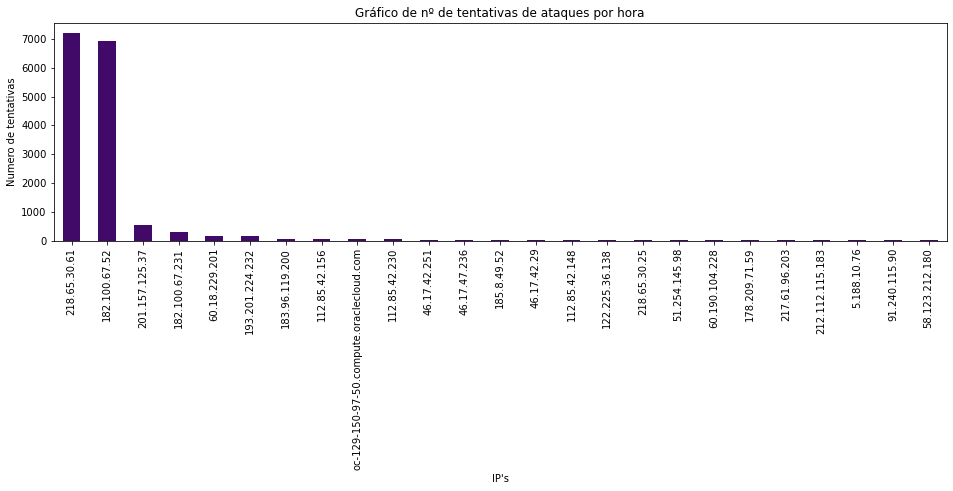

In [14]:
#plot de ataques a todos os user por ip
color = cm.inferno_r(np.linspace(0.8, .8, 30))
table_ip = table.ip.value_counts()
attack_ip= table_ip[table_ip > 5] #filtra acima de 5 tentativas
attack_ip.plot(kind='bar', stacked=True, color=color, legend=False, figsize=(16, 4))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Gráfico de nº de tentativas de ataques por hora')
plt.ylabel('Numero de tentativas')
plt.xlabel("IP's")

## Entropy


$ E = log_2(R^L)$

R -

In [15]:
attacks_root=table.user.value_counts()['root']*5
print(f'Root é o user com mais ataques com cerca de {attacks_root} por dia.')



Root é o user com mais ataques com cerca de 78740 por dia.


In [16]:
from math import log2
length = 8  # len
R = 36 # symbols
entropy = length * log2(R)
print(f'Entropia: {entropy:.3f} bits')
print(f'Total de combinações: {2 ** entropy:_.0f}')

Entropia: 41.359 bits
Total de combinações: 2_821_109_907_456


## Root login probablility

In [17]:
print(f'Ataques a root: {attacks_root}')
time_frame = max(table.index) - min(table.index)
print(f'Tempo do dataframe: {time_frame}')
attemps_root_per_day = attacks_root / time_frame.days
print(f'Ataques por dia: {attemps_root_per_day:.0f}')
brute_force_attack = (2 ** entropy) / attemps_root_per_day
print(f'Dias necessários para decifrar pass: {brute_force_attack:.1f}')

Ataques a root: 78740
Tempo do dataframe: 5 days 03:19:08
Ataques por dia: 15748
Dias necessários para decifrar pass: 179140837.4


## Conclusion

### Root é o user com mais ataques com cerca de 15748 tentativas por dia.
### O dia com mais ataques foi o dia 21/06/2021 com mais de 7000 ataques.
### Os IPs que fazem mais ataques são os 218.65.30.61 com 7193 ataques e o 182.100.67.52 com 6932 com origem na China


